# Start notebook 


In [320]:
# load libraries
import statsmodels.stats.multicomp
from statsmodels.formula.api import ols
import statsmodels.api as sm
import researchpy as rp
import statsFuncs.mean_confidence_interval as ms
from plotFuncs import prettypyplot
import scipy
from scipy import stats as stats
from scipy import stats as cp
import os
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import seaborn as sns
import glob as glob
from natsort import natsorted
sns.set(color_codes=True)

# stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import scikit_posthocs as sp

# magic functions
%load_ext autoreload
%autoreload 2
%matplotlib inline

# create dummy class for struct-like dataframes


class structtype():
    pass


matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rcParams.update({'axes.labelsize': 16.0})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Paths 

In [7]:
analysispath = os.getcwd()
mainpath = analysispath + '/../'
designpath = mainpath + '/design'
resultspath = mainpath + '/results'
stimpath = mainpath + '/stim'
practicestimpath = mainpath + '/practice'
results_csv = mainpath + '/results_csv'
analysispath = mainpath + '/analysis'
design_csv = mainpath + '/design_csv'

# Load data 

In [8]:
allsubjects = pd.read_csv('allsubjects_perifovmooney_ecc_post.csv', index_col=0)

In [9]:
numLocs = 13
numCategories = 2
numConditions = 3

accPerLocs = pd.DataFrame()
rtPerLocs = pd.DataFrame()
locations = np.unique(allsubjects['ECC_PLOT'])
subjects = np.unique(allsubjects['SUBINIT'])
conditions = ['upright', 'inverted', 'holistic']
row = 0

for sub in subjects:
    subdata = allsubjects[allsubjects['SUBINIT'] == sub]
    subid = np.unique(subdata['SUBID'])
    for locs in locations:
        for category in range(numCategories):

            if category == 0:
                index_category = 'high holistic'
            elif category == 1:
                index_category = 'low holistic'
            
            for condition in conditions:
                if condition == 'upright':
                    indexed_upright = subdata[(subdata['ECC_PLOT'] == locs)
                                                  & (subdata['COND'] == 'upright')
                                                  & (subdata['MOONEYCATEGORY'] == index_category)]

                    m_upright, lower_upright, upper_upright = ms.mean_confidence_interval(
                        indexed_upright.loc[:, 'ACCURACY'])

                    accPerLocs.loc[row, 'SUBINIT'] = sub
                    accPerLocs.loc[row, 'SUBID'] = subid
                    accPerLocs.loc[row, 'CONDITION'] = condition
                    accPerLocs.loc[row, 'ECC_PLOT'] = locs
                    accPerLocs.loc[row, 'ECC_PLOT_ABS'] = abs(locs)
                    accPerLocs.loc[row, 'MOONEYCATEGORY'] = index_category
                    accPerLocs.loc[row, 'MEAN'] = m_upright
                    accPerLocs.loc[row, 'CI_LOWER'] = lower_upright
                    accPerLocs.loc[row, 'CI_UPPER'] = upper_upright
                
                elif condition == 'inverted':
                    
                    indexed_inverted = subdata[(subdata['ECC_PLOT'] == locs)
                                                  & (subdata['COND'] == 'inverted')
                                                  & (subdata['MOONEYCATEGORY'] == index_category)]
                        
                    m_inverted, lower_inverted, upper_inverted = ms.mean_confidence_interval(
                        indexed_inverted.loc[:, 'ACCURACY'])

                    accPerLocs.loc[row, 'SUBINIT'] = sub
                    accPerLocs.loc[row, 'SUBID'] = subid
                    accPerLocs.loc[row, 'CONDITION'] = condition
                    accPerLocs.loc[row, 'ECC_PLOT'] = locs
                    accPerLocs.loc[row, 'ECC_PLOT_ABS'] = abs(locs)
                    accPerLocs.loc[row, 'MOONEYCATEGORY'] = index_category
                    accPerLocs.loc[row, 'MEAN'] = m_inverted
                    accPerLocs.loc[row, 'CI_LOWER'] = lower_inverted
                    accPerLocs.loc[row, 'CI_UPPER'] = upper_inverted
                
                elif condition == 'holistic':
                        # index the datapoints from each locations
                    indexed_upright = subdata[(subdata['ECC_PLOT'] == locs)
                                                  & (subdata['COND'] == 'upright')
                                                  & (subdata['MOONEYCATEGORY'] == index_category)]
                    indexed_inverted = subdata[(
                        subdata['ECC_PLOT'] == locs) & (subdata['COND'] == 'inverted')
                        & (subdata['MOONEYCATEGORY'] == index_category)]

                    m_upright, lower_upright, upper_upright = ms.mean_confidence_interval(
                        indexed_upright.loc[:, 'ACCURACY'])
                    m_inverted, lower_inverted, upper_inverted = ms.mean_confidence_interval(
                        indexed_inverted.loc[:, 'ACCURACY'])
                    
                    accPerLocs.loc[row, 'SUBINIT'] = sub 
                    accPerLocs.loc[row, 'SUBID'] = subid
                    accPerLocs.loc[row, 'CONDITION'] = condition
                    accPerLocs.loc[row, 'ECC_PLOT'] = locs
                    accPerLocs.loc[row, 'ECC_PLOT_ABS'] = abs(locs)
                    accPerLocs.loc[row, 'MOONEYCATEGORY'] = index_category
                    accPerLocs.loc[row, 'MEAN'] = m_upright - m_inverted
                row = row + 1

In [10]:
x = [0, 2, 4, 6, 8, 10, 12]
df_upright_high = accPerLocs[(accPerLocs['CONDITION'] == 'holistic') 
                        & (accPerLocs['MOONEYCATEGORY'] == 'high holistic')].groupby(['ECC_PLOT_ABS']).mean()
slope, intercept, r_value, p_value, std_err = stats.linregress(x,df_upright_high['MEAN'])
print('Slope for Holistic Index High holistic is: ' + str(slope))
print('Intercept for Holistic Index High holistic is: ' + str(intercept))
print('Rvalue for Holistic Index High holistic is: ' + str(r_value))

print('')

df_upright_low = accPerLocs[(accPerLocs['CONDITION'] == 'holistic') 
                        & (accPerLocs['MOONEYCATEGORY'] == 'low holistic')].groupby(['ECC_PLOT_ABS']).mean()
slope, intercept, r_value, p_value, std_err = stats.linregress(x,df_upright_low['MEAN'])
print('Slope for Holistic Index Low holistic is: ' + str(slope))
print('Intercept for Holistic Index Low holistic is: ' + str(intercept))
print('Rvalue for Holistic Index Low holistic is: ' + str(r_value))


Slope for Holistic Index High holistic is: -0.006114285714285713
Intercept for Holistic Index High holistic is: 0.2528
Rvalue for Holistic Index High holistic is: -0.9729685345075263

Slope for Holistic Index Low holistic is: 0.0036571428571428592
Intercept for Holistic Index Low holistic is: 0.05154285714285714
Rvalue for Holistic Index Low holistic is: 0.8758908985026563


In [11]:
len(allsubjects[(allsubjects['SUBINIT'] == 'AG') & (allsubjects['ECC_PLOT'] == -6.0) & (allsubjects['COND'] == 'upright')])

50

In [12]:
from itertools import permutations

In [13]:
a = permutations([1,2,3], 3)

In [14]:
b = list(a)

In [15]:
b

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [16]:
c = b[0]

In [17]:
list(c)

[1, 2, 3]

# Null distribution 

## Calculate holistic index 

In [299]:
# numLocs = len(allsubjects.ECC_PLOT_ABS.unique())
# numCategories = len(allsubjects.MOONEYCATEGORY.unique())
# numSubs  = len(allsubjects.SUBINIT.unique())
# accPerSubLocs = pd.DataFrame()

# categorynames = list(allsubjects.MOONEYCATEGORY.unique())
# locationnames = list(allsubjects.ECC_PLOT_ABS.unique())
# subinitnames = list(allsubjects.SUBINIT.unique())

# row = 0
# for subject in subinitnames:
#     # index by subject
#     subdata = allsubjects[allsubjects['SUBINIT'] == subject]
    
#     for location in locationnames:
#         # index by location
#         locationdata = subdata[subdata['ECC_PLOT_ABS'] == location]
        
#         for category in categorynames:
#             # index by category
                
#             categorydata = locationdata[locationdata['MOONEYCATEGORY'] == category]

#             # index the datapoints from each locations
#             indexed_upright = categorydata[categorydata['COND'] == 'upright']

#             indexed_inverted = categorydata[categorydata['COND'] == 'inverted']
            

#             m_upright, lower_upright, upper_upright = ms.mean_confidence_interval(
#                 indexed_upright.loc[:, 'ACCURACY'])
#             m_inverted, lower_inverted, upper_inverted = ms.mean_confidence_interval(
#                 indexed_inverted.loc[:, 'ACCURACY'])

#             accPerSubLocs.loc[row, 'SUBINIT'] = subject
#             accPerSubLocs.loc[row, 'ECC_PLOT_ABS'] = location
#             accPerSubLocs.loc[row, 'MOONEYCATEGORY'] = category
#             accPerSubLocs.loc[row, 'MEAN_UPRIGHT'] = m_upright
#             accPerSubLocs.loc[row, 'CI_LOWER_UPRIGHT'] = lower_upright
#             accPerSubLocs.loc[row, 'CI_UPPER_UPRIGHT'] = upper_upright

#             accPerSubLocs.loc[row, 'MEAN_INVERTED'] = m_inverted
#             accPerSubLocs.loc[row, 'CI_LOWER_INVERTED'] = lower_inverted
#             accPerSubLocs.loc[row, 'CI_UPPER_INVERTED'] = upper_inverted

#             accPerSubLocs.loc[row, 'HOLISTIC'] = accPerSubLocs.loc[row,
#                                                               'MEAN_UPRIGHT'] - accPerSubLocs.loc[row, 'MEAN_INVERTED']
#             row = row + 1

In [300]:
# initial_df_copy = initial_df
# permutted = initial_df_copy['MOONEYCATEGORY'].sample(n=len(initial_df_copy), random_state=1).reset_index(drop=True)
# initial_df_copy['TEST'] = permutted
# initial_df_copy

In [301]:
def calculate_holistic_diff(df, category):
    high_mean, high_lower, high_upper = ms.mean_confidence_interval(df[df[category] == 'high holistic']['MEAN'])
    low_mean, low_lower, low_upper = ms.mean_confidence_interval(df[df[category] == 'low holistic']['MEAN'])
    
    diff = high_mean - low_mean # calculate holistic difference for that location
    
    return diff



In [302]:
# diff_df = pd.DataFrame()
# ct = 0
# for location in accPerLocs.ECC_PLOT.unique():
#     initial_df = accPerLocs[accPerLocs['CONDITION'] == 'holistic']
#     ecc_df = initial_df[initial_df['ECC_PLOT'] == location].reset_index(drop=True)
#     diff = calculate_holistic_diff(ecc_df, 'MOONEYCATEGORY')
#     diff_df.loc[ct,'ECC_PLOT'] = location
#     diff_df.loc[ct,'DIFF'] = diff
    
#     # null distribution
#     nIterations = 5000
#     for iteration in range(nIterations):
#         print('Iteration n: ' + str(iteration))
#         permuted = ecc_df['MOONEYCATEGORY'].sample(n=len(ecc_df)).reset_index(drop=True)
#         ecc_df.loc[:, 'CATEGORY_PERMUTED'] = permuted

#         diff_permuted = calculate_holistic_diff(ecc_df, 'CATEGORY_PERMUTED')

#         column_title = 'PERMUTED' + str(iteration)
#         diff_df.loc[ct, column_title] = diff_permuted
        
            
#     ct += 1
    
# # calculate mean of null distribution
# for row in range(len(diff_df)):
    
#     mean, low, high = ms.mean_confidence_interval(diff_df.iloc[row, 2:5001])
#     diff_df.loc[row, 'MEAN_NULL'] = mean
#     diff_df.loc[row, 'CI_LOW_NULL'] = low
#     diff_df.loc[row, 'CI_UP_NULL'] = high

In [303]:
def calculate_holistic_diff_persub(df, category):
    
    allsubsdiff = pd.DataFrame()
    ct = 0
    for subject in df.SUBINIT.unique():
        subdata = df[df['SUBINIT'] == subject]


        high = subdata.loc[subdata[category] == 'high holistic', 'MEAN'].reset_index(drop=True)[0]

        low = subdata.loc[subdata[category] == 'low holistic', 'MEAN'].reset_index(drop=True)[0]

        sub_diff = high - low
        allsubsdiff.loc[ct, 'SUBINIT'] = subject
        allsubsdiff.loc[ct, 'DIFF'] = sub_diff
        
        ct +=1
        
    mean, low, high = ms.mean_confidence_interval(allsubsdiff['DIFF'])
    
    return mean, low, high
        

In [304]:

diff_df = pd.DataFrame()
ct = 0
for location in accPerLocs.ECC_PLOT.unique():
    print('running location: ' + str(location))
    initial_df = accPerLocs[accPerLocs['CONDITION'] == 'holistic']
    ecc_df = initial_df[initial_df['ECC_PLOT'] == location].reset_index(drop=True)
    diff, sem_low, sem_high = calculate_holistic_diff_persub(ecc_df, 'MOONEYCATEGORY')
    diff_df.loc[ct,'ECC_PLOT'] = location
    diff_df.loc[ct,'DIFF'] = diff
    diff_df.loc[ct,'SEM_LOW'] = sem_low
    diff_df.loc[ct,'SEM_HIGH'] = sem_high
    
    # null distribution
    nIterations = 5000
    for iteration in range(nIterations):
#         print('Iteration n: ' + str(iteration))
        row=0

        for subject in ecc_df.SUBINIT.unique():
            subdata = ecc_df[ecc_df['SUBINIT'] == subject]
            permuted = subdata['MOONEYCATEGORY'].sample(n=len(subdata)).reset_index(drop=True)
            ecc_df.loc[row, 'CATEGORY_PERMUTED'] = permuted[0]
            ecc_df.loc[row+1, 'CATEGORY_PERMUTED'] = permuted[1]
           
            row += 2

        diff_permuted, sem_low_permuted, sem_high_permuted = calculate_holistic_diff_persub(ecc_df, 'CATEGORY_PERMUTED')

        column_title = 'PERMUTED' + str(iteration)
        diff_df.loc[ct, column_title] = diff_permuted

            
    ct += 1
    
# calculate mean of null distribution
for row in range(len(diff_df)):
    
    mean, low, high = ms.confidence_interval_percentile(diff_df.iloc[row, 4:nIterations+3])
    diff_df.loc[row, 'MEAN_NULL'] = mean
    diff_df.loc[row, 'CI_LOW_NULL'] = low
    diff_df.loc[row, 'CI_UP_NULL'] = high

running location: -6.0
running location: -5.0
running location: -4.0
running location: -3.0
running location: -2.0
running location: -1.0
running location: 0.0
running location: 1.0
running location: 2.0
running location: 3.0
running location: 4.0
running location: 5.0
running location: 6.0


In [305]:
diff_df.to_csv('boostrap_diff_eccvalues.csv')

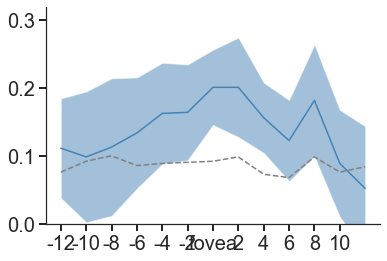

In [325]:
fig, ax = plt.subplots()
ax.plot(range(len(diff_df)), diff_df['DIFF'], color='steelblue')
ax.fill_between(range(len(diff_df)), diff_df['SEM_LOW'], diff_df['SEM_HIGH'],facecolor='steelblue', alpha=0.5)

# ax.plot(range(len(diff_df)), diff_df['MEAN_NULL'], color='lightgray')

# prettypyplot.beautiPlot(sns)

# ax.fill_between(range(len(diff_df)), diff_df['CI_LOW_NULL'], diff_df['CI_UP_NULL'],facecolor='lightgray', alpha=0.5)

ax.plot(range(len(diff_df)), diff_df['CI_UP_NULL'], color='gray', linestyle='--')

prettypyplot.beautiPlot(sns)
xlabels_abs = ['-12', '-10', '-8', '-6', '-4', '-2', 'fovea', '2', '4', '6', '8', '10', '12']
plt.xticks(range(12), xlabels_abs)
plt.ylim(0, 0.32)
ax.tick_params(axis='both',which='major',direction='out',bottom=True, left=True, width=2, length=7)
plt.show()


In [ ]:
initial_df = allsubjects.groupby(['SUBINIT', 'MOONEYCATEGORY', 'ECC_PLOT'], as_index=False).mean()

## Null distribution shuffling at trial-level 

In [202]:
print(len(allsubjects[(allsubjects['SUBINIT'] == 'AG') & (allsubjects['ECC_PLOT'] == -6) & (allsubjects['COND'] == 'upright')]))
print(len(allsubjects[(allsubjects['MOONEYCATEGORY'] == 'high holistic') & (allsubjects['SUBINIT'] == 'AG') & (allsubjects['ECC_PLOT'] == -6) & (allsubjects['COND'] == 'upright')]))
print(len(allsubjects[(allsubjects['MOONEYCATEGORY'] == 'low holistic') & (allsubjects['SUBINIT'] == 'AG') & (allsubjects['ECC_PLOT'] == -6) & (allsubjects['COND'] == 'upright')]))

test = allsubjects[(allsubjects['SUBINIT'] == 'AG') & (allsubjects['ECC_PLOT'] == -6) & (allsubjects['COND'] == 'upright')].reset_index(drop=True)

50
25
25


In [198]:
test.loc[:, 'permuted'] = test['MOONEYCATEGORY'].sample(n=len(test)).reset_index(drop=True)

In [307]:
null_diff_df = pd.DataFrame()
null_low_diff = pd.DataFrame()
null_up_diff = pd.DataFrame()

nIterations = 5000
ct = 0

for iteration in range(nIterations):
    print('Iteration n: ' + str(iteration))
    
    ###### STEP 1 #######
    data_wpermuted = pd.DataFrame()
    for subject in allsubjects.SUBINIT.unique():
        for location in allsubjects.ECC_PLOT.unique():
            for condition in allsubjects.COND.unique():
                subdata = allsubjects[(allsubjects['SUBINIT'] == subject) & (allsubjects['ECC_PLOT'] == location) & (allsubjects['COND'] == condition)].reset_index(drop=True)
                title_iteration = 'permuted' + str(iteration)
                subdata.loc[:, 'permuted_MOONEYCATEGORY'] = subdata['MOONEYCATEGORY'].sample(n=len(subdata)).reset_index(drop=True)


                data_wpermuted = data_wpermuted.append(subdata)
    
    ###### STEP 2 ######
    null_accPerSubLocs = pd.DataFrame()

    numLocs = 13
    numCategories = 2
    numConditions = 3

    null_accPerSubLocs = pd.DataFrame()
    conditions = ['upright', 'inverted', 'holistic']
    row = 0

    for sub in data_wpermuted.SUBINIT.unique():
        subdata = data_wpermuted[data_wpermuted['SUBINIT'] == sub]
        subid = np.unique(subdata['SUBID'])
        for locs in data_wpermuted.ECC_PLOT.unique():
            for category in range(numCategories):

                if category == 0:
                    index_category = 'high holistic'
                elif category == 1:
                    index_category = 'low holistic'

                for condition in conditions:
                    if condition == 'upright':
                        indexed_upright = subdata[(subdata['ECC_PLOT'] == locs)
                                                      & (subdata['COND'] == 'upright')
                                                      & (subdata['permuted_MOONEYCATEGORY'] == index_category)]

                        m_upright, lower_upright, upper_upright = ms.mean_confidence_interval(
                            indexed_upright.loc[:, 'ACCURACY'])

                        null_accPerSubLocs.loc[row, 'SUBINIT'] = sub
                        null_accPerSubLocs.loc[row, 'SUBID'] = subid
                        null_accPerSubLocs.loc[row, 'CONDITION'] = condition
                        null_accPerSubLocs.loc[row, 'ECC_PLOT'] = locs
                        null_accPerSubLocs.loc[row, 'ECC_PLOT_ABS'] = abs(locs)
                        null_accPerSubLocs.loc[row, 'permuted_MOONEYCATEGORY'] = index_category
                        null_accPerSubLocs.loc[row, 'MEAN'] = m_upright
                        null_accPerSubLocs.loc[row, 'CI_LOWER'] = lower_upright
                        null_accPerSubLocs.loc[row, 'CI_UPPER'] = upper_upright

                    elif condition == 'inverted':

                        indexed_inverted = subdata[(subdata['ECC_PLOT'] == locs)
                                                      & (subdata['COND'] == 'inverted')
                                                      & (subdata['permuted_MOONEYCATEGORY'] == index_category)]

                        m_inverted, lower_inverted, upper_inverted = ms.mean_confidence_interval(
                            indexed_inverted.loc[:, 'ACCURACY'])

                        null_accPerSubLocs.loc[row, 'SUBINIT'] = sub
                        null_accPerSubLocs.loc[row, 'SUBID'] = subid
                        null_accPerSubLocs.loc[row, 'CONDITION'] = condition
                        null_accPerSubLocs.loc[row, 'ECC_PLOT'] = locs
                        null_accPerSubLocs.loc[row, 'ECC_PLOT_ABS'] = abs(locs)
                        null_accPerSubLocs.loc[row, 'permuted_MOONEYCATEGORY'] = index_category
                        null_accPerSubLocs.loc[row, 'MEAN'] = m_inverted
                        null_accPerSubLocs.loc[row, 'CI_LOWER'] = lower_inverted
                        null_accPerSubLocs.loc[row, 'CI_UPPER'] = upper_inverted

                    elif condition == 'holistic':
                            # index the datapoints from each locations
                        indexed_upright = subdata[(subdata['ECC_PLOT'] == locs)
                                                      & (subdata['COND'] == 'upright')
                                                      & (subdata['permuted_MOONEYCATEGORY'] == index_category)]
                        indexed_inverted = subdata[(
                            subdata['ECC_PLOT'] == locs) & (subdata['COND'] == 'inverted')
                            & (subdata['permuted_MOONEYCATEGORY'] == index_category)]

                        m_upright, lower_upright, upper_upright = ms.mean_confidence_interval(
                            indexed_upright.loc[:, 'ACCURACY'])
                        m_inverted, lower_inverted, upper_inverted = ms.mean_confidence_interval(
                            indexed_inverted.loc[:, 'ACCURACY'])

                        null_accPerSubLocs.loc[row, 'SUBINIT'] = sub 
                        null_accPerSubLocs.loc[row, 'SUBID'] = subid
                        null_accPerSubLocs.loc[row, 'CONDITION'] = condition
                        null_accPerSubLocs.loc[row, 'ECC_PLOT'] = locs
                        null_accPerSubLocs.loc[row, 'ECC_PLOT_ABS'] = abs(locs)
                        null_accPerSubLocs.loc[row, 'permuted_MOONEYCATEGORY'] = index_category
                        null_accPerSubLocs.loc[row, 'MEAN'] = m_upright - m_inverted
                    row = row + 1

    
    ####### STEP 3 ########
    for location in null_accPerSubLocs.ECC_PLOT.unique():
        initial_df = null_accPerSubLocs[null_accPerSubLocs['CONDITION'] == 'holistic']
        ecc_df = initial_df[initial_df['ECC_PLOT'] == location].reset_index(drop=True)
        null_dif, null_sem_low, null_sem_high = calculate_holistic_diff_persub(ecc_df, 'permuted_MOONEYCATEGORY')
        null_diff_df.loc[ct,'ECC_PLOT'] = location
        null_diff_df.loc[ct,'NULL_DIFF'] = null_dif
        null_diff_df.loc[ct,'NULL_SEM_LOW'] = null_sem_low
        null_diff_df.loc[ct,'NULL_SEM_HIGH'] = null_sem_high
        
        ct += 1

Iteration n: 0
Iteration n: 1
Iteration n: 2
Iteration n: 3
Iteration n: 4
Iteration n: 5
Iteration n: 6
Iteration n: 7
Iteration n: 8
Iteration n: 9
Iteration n: 10
Iteration n: 11
Iteration n: 12
Iteration n: 13
Iteration n: 14
Iteration n: 15
Iteration n: 16
Iteration n: 17
Iteration n: 18
Iteration n: 19
Iteration n: 20
Iteration n: 21
Iteration n: 22
Iteration n: 23
Iteration n: 24
Iteration n: 25
Iteration n: 26
Iteration n: 27
Iteration n: 28
Iteration n: 29
Iteration n: 30
Iteration n: 31
Iteration n: 32
Iteration n: 33
Iteration n: 34
Iteration n: 35
Iteration n: 36
Iteration n: 37
Iteration n: 38
Iteration n: 39
Iteration n: 40
Iteration n: 41
Iteration n: 42
Iteration n: 43
Iteration n: 44
Iteration n: 45
Iteration n: 46
Iteration n: 47
Iteration n: 48
Iteration n: 49
Iteration n: 50
Iteration n: 51
Iteration n: 52
Iteration n: 53
Iteration n: 54
Iteration n: 55
Iteration n: 56
Iteration n: 57
Iteration n: 58
Iteration n: 59
Iteration n: 60
Iteration n: 61
Iteration n: 62
It

Iteration n: 489
Iteration n: 490
Iteration n: 491
Iteration n: 492
Iteration n: 493
Iteration n: 494
Iteration n: 495
Iteration n: 496
Iteration n: 497
Iteration n: 498
Iteration n: 499
Iteration n: 500
Iteration n: 501
Iteration n: 502
Iteration n: 503
Iteration n: 504
Iteration n: 505
Iteration n: 506
Iteration n: 507
Iteration n: 508
Iteration n: 509
Iteration n: 510
Iteration n: 511
Iteration n: 512
Iteration n: 513
Iteration n: 514
Iteration n: 515
Iteration n: 516
Iteration n: 517
Iteration n: 518
Iteration n: 519
Iteration n: 520
Iteration n: 521
Iteration n: 522
Iteration n: 523
Iteration n: 524
Iteration n: 525
Iteration n: 526
Iteration n: 527
Iteration n: 528
Iteration n: 529
Iteration n: 530
Iteration n: 531
Iteration n: 532
Iteration n: 533
Iteration n: 534
Iteration n: 535
Iteration n: 536
Iteration n: 537
Iteration n: 538
Iteration n: 539
Iteration n: 540
Iteration n: 541
Iteration n: 542
Iteration n: 543
Iteration n: 544
Iteration n: 545
Iteration n: 546
Iteration n: 5

Iteration n: 971
Iteration n: 972
Iteration n: 973
Iteration n: 974
Iteration n: 975
Iteration n: 976
Iteration n: 977
Iteration n: 978
Iteration n: 979
Iteration n: 980
Iteration n: 981
Iteration n: 982
Iteration n: 983
Iteration n: 984
Iteration n: 985
Iteration n: 986
Iteration n: 987
Iteration n: 988
Iteration n: 989
Iteration n: 990
Iteration n: 991
Iteration n: 992
Iteration n: 993
Iteration n: 994
Iteration n: 995
Iteration n: 996
Iteration n: 997
Iteration n: 998
Iteration n: 999
Iteration n: 1000
Iteration n: 1001
Iteration n: 1002
Iteration n: 1003
Iteration n: 1004
Iteration n: 1005
Iteration n: 1006
Iteration n: 1007
Iteration n: 1008
Iteration n: 1009
Iteration n: 1010
Iteration n: 1011
Iteration n: 1012
Iteration n: 1013
Iteration n: 1014
Iteration n: 1015
Iteration n: 1016
Iteration n: 1017
Iteration n: 1018
Iteration n: 1019
Iteration n: 1020
Iteration n: 1021
Iteration n: 1022
Iteration n: 1023
Iteration n: 1024
Iteration n: 1025
Iteration n: 1026
Iteration n: 1027
Ite

Iteration n: 1428
Iteration n: 1429
Iteration n: 1430
Iteration n: 1431
Iteration n: 1432
Iteration n: 1433
Iteration n: 1434
Iteration n: 1435
Iteration n: 1436
Iteration n: 1437
Iteration n: 1438
Iteration n: 1439
Iteration n: 1440
Iteration n: 1441
Iteration n: 1442
Iteration n: 1443
Iteration n: 1444
Iteration n: 1445
Iteration n: 1446
Iteration n: 1447
Iteration n: 1448
Iteration n: 1449
Iteration n: 1450
Iteration n: 1451
Iteration n: 1452
Iteration n: 1453
Iteration n: 1454
Iteration n: 1455
Iteration n: 1456
Iteration n: 1457
Iteration n: 1458
Iteration n: 1459
Iteration n: 1460
Iteration n: 1461
Iteration n: 1462
Iteration n: 1463
Iteration n: 1464
Iteration n: 1465
Iteration n: 1466
Iteration n: 1467
Iteration n: 1468
Iteration n: 1469
Iteration n: 1470
Iteration n: 1471
Iteration n: 1472
Iteration n: 1473
Iteration n: 1474
Iteration n: 1475
Iteration n: 1476
Iteration n: 1477
Iteration n: 1478
Iteration n: 1479
Iteration n: 1480
Iteration n: 1481
Iteration n: 1482
Iteration 

KeyboardInterrupt: 

In [308]:
null_diff_df.to_csv('null_diff_perTrial.csv')

In [311]:
null_diff_df[null_diff_df['ECC_PLOT'] == -6]

,ECC_PLOT,NULL_DIFF,NULL_SEM_LOW,NULL_SEM_HIGH
0,-6.0,-0.0352,-0.094026,0.023626
13,-6.0,0.0448,-0.029702,0.119302
26,-6.0,0.0064,-0.061289,0.074089
39,-6.0,-0.0480,-0.125444,0.029444
52,-6.0,0.0576,0.005370,0.109830
...,...,...,...,...
21190,-6.0,-0.0160,-0.106686,0.074686
21203,-6.0,0.0320,-0.033353,0.097353
21216,-6.0,0.0160,-0.069529,0.101529
21229,-6.0,-0.0224,-0.089143,0.044343


In [314]:
# calculate mean of null distribution
null_diff_df_short = pd.DataFrame()
row = 0 
for location in null_diff_df.ECC_PLOT.unique():
    tmp = null_diff_df[null_diff_df['ECC_PLOT'] == location]
    mean, low, high = ms.confidence_interval_percentile(tmp.loc[:,'NULL_DIFF'])
    null_diff_df_short.loc[row, 'ECC_PLOT'] = location
    null_diff_df_short.loc[row, 'MEAN_NULL'] = mean
    null_diff_df_short.loc[row, 'CI_LOW_NULL'] = low
    null_diff_df_short.loc[row, 'CI_UP_NULL'] = high
    row += 1

In [ ]:
# calculate upper 9

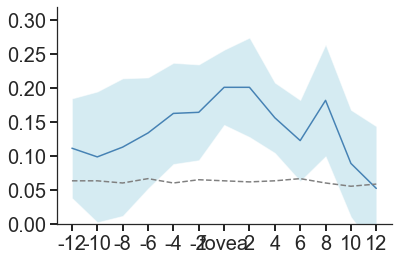

In [330]:
fig, ax = plt.subplots()
ax.plot(range(len(diff_df)), diff_df['DIFF'], color='steelblue')
ax.fill_between(range(len(diff_df)), diff_df['SEM_LOW'], diff_df['SEM_HIGH'],facecolor='lightblue', alpha=0.5)


## new null
# ax.plot(range(len(null_diff_df_short)), null_diff_df_short['MEAN_NULL'])
# ax.fill_between(range(len(null_diff_df_short)), null_diff_df_short['CI_LOW_NULL'], null_diff_df_short['CI_UP_NULL'],facecolor='gray', alpha=0.5)

ax.plot(range(len(null_diff_df_short)), null_diff_df_short['CI_UP_NULL'], color='gray', linestyle='--')

prettypyplot.beautiPlot(sns)
xlabels_abs = ['-12', '-10', '-8', '-6', '-4', '-2', 'fovea', '2', '4', '6', '8', '10', '12']
plt.xticks(range(13), xlabels_abs)
plt.yticks(np.arange(start=0, stop=0.35,step=0.05))
plt.ylim(0, 0.32)
ax.tick_params(axis='both',which='major',direction='out',bottom=True, left=True, width=2, length=7)
plt.savefig('Nonabs_cc_diff_wnull.svg', format='svg', dpi=1200)

plt.show()

## Abs Ecc null distribution 

In [352]:

abs_diff_df = pd.DataFrame()
ct = 0
for location in accPerLocs.ECC_PLOT_ABS.unique():
    print('running location: ' + str(location))
    initial_df = accPerLocs[accPerLocs['CONDITION'] == 'holistic']
    ecc_df = initial_df[initial_df['ECC_PLOT_ABS'] == location].reset_index(drop=True)
    diff, sem_low, sem_high = calculate_holistic_diff_persub(ecc_df, 'MOONEYCATEGORY')
    abs_diff_df.loc[ct,'ECC_PLOT_ABS'] = location
    abs_diff_df.loc[ct,'DIFF'] = diff
    abs_diff_df.loc[ct,'SEM_LOW'] = sem_low
    abs_diff_df.loc[ct,'SEM_HIGH'] = sem_high
    abs_diff_df.sort_values(by=['ECC_PLOT_ABS'], inplace=True)
    ct += 1

running location: 6.0
running location: 5.0
running location: 4.0
running location: 3.0
running location: 2.0
running location: 1.0
running location: 0.0


In [331]:
abs_null_diff_df = pd.DataFrame()
null_low_diff = pd.DataFrame()
null_up_diff = pd.DataFrame()

nIterations = 5000
ct = 0

for iteration in range(nIterations):
    print('Iteration n: ' + str(iteration))
    
    ###### STEP 1 #######
    data_wpermuted = pd.DataFrame()
    for subject in allsubjects.SUBINIT.unique():
        for location in allsubjects.ECC_PLOT.unique():
            for condition in allsubjects.COND.unique():
                subdata = allsubjects[(allsubjects['SUBINIT'] == subject) & (allsubjects['ECC_PLOT'] == location) & (allsubjects['COND'] == condition)].reset_index(drop=True)
                title_iteration = 'permuted' + str(iteration)
                subdata.loc[:, 'permuted_MOONEYCATEGORY'] = subdata['MOONEYCATEGORY'].sample(n=len(subdata)).reset_index(drop=True)


                data_wpermuted = data_wpermuted.append(subdata)
    
    ###### STEP 2 ######
    null_accPerSubLocs = pd.DataFrame()

    numLocs = 13
    numCategories = 2
    numConditions = 3

    null_accPerSubLocs = pd.DataFrame()
    conditions = ['upright', 'inverted', 'holistic']
    row = 0

    for sub in data_wpermuted.SUBINIT.unique():
        subdata = data_wpermuted[data_wpermuted['SUBINIT'] == sub]
        subid = np.unique(subdata['SUBID'])
        for locs in data_wpermuted.ECC_PLOT.unique():
            for category in range(numCategories):

                if category == 0:
                    index_category = 'high holistic'
                elif category == 1:
                    index_category = 'low holistic'

                for condition in conditions:
                    if condition == 'upright':
                        indexed_upright = subdata[(subdata['ECC_PLOT'] == locs)
                                                      & (subdata['COND'] == 'upright')
                                                      & (subdata['permuted_MOONEYCATEGORY'] == index_category)]

                        m_upright, lower_upright, upper_upright = ms.mean_confidence_interval(
                            indexed_upright.loc[:, 'ACCURACY'])

                        null_accPerSubLocs.loc[row, 'SUBINIT'] = sub
                        null_accPerSubLocs.loc[row, 'SUBID'] = subid
                        null_accPerSubLocs.loc[row, 'CONDITION'] = condition
                        null_accPerSubLocs.loc[row, 'ECC_PLOT'] = locs
                        null_accPerSubLocs.loc[row, 'ECC_PLOT_ABS'] = abs(locs)
                        null_accPerSubLocs.loc[row, 'permuted_MOONEYCATEGORY'] = index_category
                        null_accPerSubLocs.loc[row, 'MEAN'] = m_upright
                        null_accPerSubLocs.loc[row, 'CI_LOWER'] = lower_upright
                        null_accPerSubLocs.loc[row, 'CI_UPPER'] = upper_upright

                    elif condition == 'inverted':

                        indexed_inverted = subdata[(subdata['ECC_PLOT'] == locs)
                                                      & (subdata['COND'] == 'inverted')
                                                      & (subdata['permuted_MOONEYCATEGORY'] == index_category)]

                        m_inverted, lower_inverted, upper_inverted = ms.mean_confidence_interval(
                            indexed_inverted.loc[:, 'ACCURACY'])

                        null_accPerSubLocs.loc[row, 'SUBINIT'] = sub
                        null_accPerSubLocs.loc[row, 'SUBID'] = subid
                        null_accPerSubLocs.loc[row, 'CONDITION'] = condition
                        null_accPerSubLocs.loc[row, 'ECC_PLOT'] = locs
                        null_accPerSubLocs.loc[row, 'ECC_PLOT_ABS'] = abs(locs)
                        null_accPerSubLocs.loc[row, 'permuted_MOONEYCATEGORY'] = index_category
                        null_accPerSubLocs.loc[row, 'MEAN'] = m_inverted
                        null_accPerSubLocs.loc[row, 'CI_LOWER'] = lower_inverted
                        null_accPerSubLocs.loc[row, 'CI_UPPER'] = upper_inverted

                    elif condition == 'holistic':
                            # index the datapoints from each locations
                        indexed_upright = subdata[(subdata['ECC_PLOT'] == locs)
                                                      & (subdata['COND'] == 'upright')
                                                      & (subdata['permuted_MOONEYCATEGORY'] == index_category)]
                        indexed_inverted = subdata[(
                            subdata['ECC_PLOT'] == locs) & (subdata['COND'] == 'inverted')
                            & (subdata['permuted_MOONEYCATEGORY'] == index_category)]

                        m_upright, lower_upright, upper_upright = ms.mean_confidence_interval(
                            indexed_upright.loc[:, 'ACCURACY'])
                        m_inverted, lower_inverted, upper_inverted = ms.mean_confidence_interval(
                            indexed_inverted.loc[:, 'ACCURACY'])

                        null_accPerSubLocs.loc[row, 'SUBINIT'] = sub 
                        null_accPerSubLocs.loc[row, 'SUBID'] = subid
                        null_accPerSubLocs.loc[row, 'CONDITION'] = condition
                        null_accPerSubLocs.loc[row, 'ECC_PLOT'] = locs
                        null_accPerSubLocs.loc[row, 'ECC_PLOT_ABS'] = abs(locs)
                        null_accPerSubLocs.loc[row, 'permuted_MOONEYCATEGORY'] = index_category
                        null_accPerSubLocs.loc[row, 'MEAN'] = m_upright - m_inverted
                    row = row + 1

    
    ####### STEP 3 ########
    for location in null_accPerSubLocs.ECC_PLOT_ABS.unique():
        initial_df = null_accPerSubLocs[null_accPerSubLocs['CONDITION'] == 'holistic']
        ecc_df = initial_df[initial_df['ECC_PLOT_ABS'] == location].reset_index(drop=True)
        null_diff, null_sem_low, null_sem_high = calculate_holistic_diff_persub(ecc_df, 'permuted_MOONEYCATEGORY')
        abs_null_diff_df.loc[ct,'ECC_PLOT_ABS'] = location
        abs_null_diff_df.loc[ct,'NULL_DIFF'] = null_diff
        abs_null_diff_df.loc[ct,'NULL_SEM_LOW'] = null_sem_low
        abs_null_diff_df.loc[ct,'NULL_SEM_HIGH'] = null_sem_high
        
        ct += 1

Iteration n: 0
Iteration n: 1
Iteration n: 2
Iteration n: 3
Iteration n: 4
Iteration n: 5
Iteration n: 6
Iteration n: 7
Iteration n: 8
Iteration n: 9
Iteration n: 10
Iteration n: 11
Iteration n: 12
Iteration n: 13
Iteration n: 14
Iteration n: 15
Iteration n: 16
Iteration n: 17
Iteration n: 18
Iteration n: 19
Iteration n: 20
Iteration n: 21
Iteration n: 22
Iteration n: 23
Iteration n: 24
Iteration n: 25
Iteration n: 26
Iteration n: 27
Iteration n: 28
Iteration n: 29
Iteration n: 30
Iteration n: 31
Iteration n: 32
Iteration n: 33
Iteration n: 34
Iteration n: 35
Iteration n: 36
Iteration n: 37
Iteration n: 38
Iteration n: 39
Iteration n: 40
Iteration n: 41
Iteration n: 42
Iteration n: 43
Iteration n: 44
Iteration n: 45
Iteration n: 46
Iteration n: 47
Iteration n: 48
Iteration n: 49
Iteration n: 50
Iteration n: 51
Iteration n: 52
Iteration n: 53
Iteration n: 54
Iteration n: 55
Iteration n: 56
Iteration n: 57
Iteration n: 58
Iteration n: 59
Iteration n: 60
Iteration n: 61
Iteration n: 62
It

Iteration n: 489
Iteration n: 490
Iteration n: 491
Iteration n: 492
Iteration n: 493
Iteration n: 494
Iteration n: 495
Iteration n: 496
Iteration n: 497
Iteration n: 498
Iteration n: 499
Iteration n: 500
Iteration n: 501
Iteration n: 502
Iteration n: 503
Iteration n: 504
Iteration n: 505
Iteration n: 506
Iteration n: 507
Iteration n: 508
Iteration n: 509
Iteration n: 510
Iteration n: 511
Iteration n: 512
Iteration n: 513
Iteration n: 514
Iteration n: 515
Iteration n: 516
Iteration n: 517
Iteration n: 518
Iteration n: 519
Iteration n: 520
Iteration n: 521
Iteration n: 522
Iteration n: 523
Iteration n: 524
Iteration n: 525
Iteration n: 526
Iteration n: 527
Iteration n: 528
Iteration n: 529
Iteration n: 530
Iteration n: 531
Iteration n: 532
Iteration n: 533
Iteration n: 534
Iteration n: 535
Iteration n: 536
Iteration n: 537
Iteration n: 538
Iteration n: 539
Iteration n: 540
Iteration n: 541
Iteration n: 542
Iteration n: 543
Iteration n: 544
Iteration n: 545
Iteration n: 546
Iteration n: 5

Iteration n: 971
Iteration n: 972
Iteration n: 973
Iteration n: 974
Iteration n: 975
Iteration n: 976
Iteration n: 977
Iteration n: 978
Iteration n: 979
Iteration n: 980
Iteration n: 981
Iteration n: 982
Iteration n: 983
Iteration n: 984
Iteration n: 985
Iteration n: 986
Iteration n: 987
Iteration n: 988
Iteration n: 989
Iteration n: 990
Iteration n: 991
Iteration n: 992
Iteration n: 993
Iteration n: 994
Iteration n: 995
Iteration n: 996
Iteration n: 997
Iteration n: 998
Iteration n: 999
Iteration n: 1000
Iteration n: 1001
Iteration n: 1002
Iteration n: 1003
Iteration n: 1004
Iteration n: 1005
Iteration n: 1006
Iteration n: 1007
Iteration n: 1008
Iteration n: 1009
Iteration n: 1010
Iteration n: 1011
Iteration n: 1012
Iteration n: 1013
Iteration n: 1014
Iteration n: 1015
Iteration n: 1016
Iteration n: 1017
Iteration n: 1018
Iteration n: 1019
Iteration n: 1020
Iteration n: 1021
Iteration n: 1022
Iteration n: 1023
Iteration n: 1024
Iteration n: 1025
Iteration n: 1026
Iteration n: 1027
Ite

Iteration n: 1428
Iteration n: 1429
Iteration n: 1430
Iteration n: 1431
Iteration n: 1432
Iteration n: 1433
Iteration n: 1434
Iteration n: 1435
Iteration n: 1436
Iteration n: 1437
Iteration n: 1438
Iteration n: 1439
Iteration n: 1440
Iteration n: 1441
Iteration n: 1442
Iteration n: 1443
Iteration n: 1444
Iteration n: 1445
Iteration n: 1446
Iteration n: 1447
Iteration n: 1448
Iteration n: 1449
Iteration n: 1450
Iteration n: 1451
Iteration n: 1452
Iteration n: 1453
Iteration n: 1454
Iteration n: 1455
Iteration n: 1456
Iteration n: 1457
Iteration n: 1458
Iteration n: 1459
Iteration n: 1460
Iteration n: 1461
Iteration n: 1462
Iteration n: 1463
Iteration n: 1464
Iteration n: 1465
Iteration n: 1466
Iteration n: 1467
Iteration n: 1468
Iteration n: 1469
Iteration n: 1470
Iteration n: 1471
Iteration n: 1472
Iteration n: 1473
Iteration n: 1474
Iteration n: 1475
Iteration n: 1476
Iteration n: 1477
Iteration n: 1478
Iteration n: 1479
Iteration n: 1480
Iteration n: 1481
Iteration n: 1482
Iteration 

Iteration n: 1884
Iteration n: 1885
Iteration n: 1886
Iteration n: 1887
Iteration n: 1888
Iteration n: 1889
Iteration n: 1890
Iteration n: 1891
Iteration n: 1892
Iteration n: 1893
Iteration n: 1894
Iteration n: 1895
Iteration n: 1896
Iteration n: 1897
Iteration n: 1898
Iteration n: 1899
Iteration n: 1900
Iteration n: 1901
Iteration n: 1902
Iteration n: 1903
Iteration n: 1904
Iteration n: 1905
Iteration n: 1906
Iteration n: 1907
Iteration n: 1908
Iteration n: 1909
Iteration n: 1910
Iteration n: 1911
Iteration n: 1912
Iteration n: 1913
Iteration n: 1914
Iteration n: 1915
Iteration n: 1916
Iteration n: 1917
Iteration n: 1918
Iteration n: 1919
Iteration n: 1920
Iteration n: 1921
Iteration n: 1922
Iteration n: 1923
Iteration n: 1924
Iteration n: 1925
Iteration n: 1926
Iteration n: 1927
Iteration n: 1928
Iteration n: 1929
Iteration n: 1930
Iteration n: 1931
Iteration n: 1932
Iteration n: 1933
Iteration n: 1934
Iteration n: 1935
Iteration n: 1936
Iteration n: 1937
Iteration n: 1938
Iteration 

Iteration n: 2340
Iteration n: 2341
Iteration n: 2342
Iteration n: 2343
Iteration n: 2344
Iteration n: 2345
Iteration n: 2346
Iteration n: 2347
Iteration n: 2348
Iteration n: 2349
Iteration n: 2350
Iteration n: 2351
Iteration n: 2352
Iteration n: 2353
Iteration n: 2354
Iteration n: 2355
Iteration n: 2356
Iteration n: 2357
Iteration n: 2358
Iteration n: 2359
Iteration n: 2360
Iteration n: 2361
Iteration n: 2362
Iteration n: 2363
Iteration n: 2364
Iteration n: 2365
Iteration n: 2366
Iteration n: 2367
Iteration n: 2368
Iteration n: 2369
Iteration n: 2370
Iteration n: 2371
Iteration n: 2372
Iteration n: 2373
Iteration n: 2374
Iteration n: 2375
Iteration n: 2376
Iteration n: 2377
Iteration n: 2378
Iteration n: 2379
Iteration n: 2380
Iteration n: 2381
Iteration n: 2382
Iteration n: 2383
Iteration n: 2384
Iteration n: 2385
Iteration n: 2386
Iteration n: 2387
Iteration n: 2388
Iteration n: 2389
Iteration n: 2390
Iteration n: 2391
Iteration n: 2392
Iteration n: 2393
Iteration n: 2394
Iteration 

Iteration n: 2796
Iteration n: 2797
Iteration n: 2798
Iteration n: 2799
Iteration n: 2800
Iteration n: 2801
Iteration n: 2802
Iteration n: 2803
Iteration n: 2804
Iteration n: 2805
Iteration n: 2806
Iteration n: 2807
Iteration n: 2808
Iteration n: 2809
Iteration n: 2810
Iteration n: 2811
Iteration n: 2812
Iteration n: 2813
Iteration n: 2814
Iteration n: 2815
Iteration n: 2816
Iteration n: 2817
Iteration n: 2818
Iteration n: 2819
Iteration n: 2820
Iteration n: 2821
Iteration n: 2822
Iteration n: 2823
Iteration n: 2824
Iteration n: 2825
Iteration n: 2826
Iteration n: 2827
Iteration n: 2828
Iteration n: 2829
Iteration n: 2830
Iteration n: 2831
Iteration n: 2832
Iteration n: 2833
Iteration n: 2834
Iteration n: 2835
Iteration n: 2836
Iteration n: 2837
Iteration n: 2838
Iteration n: 2839
Iteration n: 2840
Iteration n: 2841
Iteration n: 2842
Iteration n: 2843
Iteration n: 2844
Iteration n: 2845
Iteration n: 2846
Iteration n: 2847
Iteration n: 2848
Iteration n: 2849
Iteration n: 2850
Iteration 

Iteration n: 3252
Iteration n: 3253
Iteration n: 3254
Iteration n: 3255
Iteration n: 3256
Iteration n: 3257
Iteration n: 3258
Iteration n: 3259
Iteration n: 3260
Iteration n: 3261
Iteration n: 3262
Iteration n: 3263
Iteration n: 3264
Iteration n: 3265
Iteration n: 3266
Iteration n: 3267
Iteration n: 3268
Iteration n: 3269
Iteration n: 3270
Iteration n: 3271
Iteration n: 3272
Iteration n: 3273
Iteration n: 3274
Iteration n: 3275
Iteration n: 3276
Iteration n: 3277
Iteration n: 3278
Iteration n: 3279
Iteration n: 3280
Iteration n: 3281
Iteration n: 3282
Iteration n: 3283
Iteration n: 3284
Iteration n: 3285
Iteration n: 3286
Iteration n: 3287
Iteration n: 3288
Iteration n: 3289
Iteration n: 3290
Iteration n: 3291
Iteration n: 3292
Iteration n: 3293
Iteration n: 3294
Iteration n: 3295
Iteration n: 3296
Iteration n: 3297
Iteration n: 3298
Iteration n: 3299
Iteration n: 3300
Iteration n: 3301
Iteration n: 3302
Iteration n: 3303
Iteration n: 3304
Iteration n: 3305
Iteration n: 3306
Iteration 

Iteration n: 3708
Iteration n: 3709
Iteration n: 3710
Iteration n: 3711
Iteration n: 3712
Iteration n: 3713
Iteration n: 3714
Iteration n: 3715
Iteration n: 3716
Iteration n: 3717
Iteration n: 3718
Iteration n: 3719
Iteration n: 3720
Iteration n: 3721
Iteration n: 3722
Iteration n: 3723
Iteration n: 3724
Iteration n: 3725
Iteration n: 3726
Iteration n: 3727
Iteration n: 3728
Iteration n: 3729
Iteration n: 3730
Iteration n: 3731
Iteration n: 3732
Iteration n: 3733
Iteration n: 3734
Iteration n: 3735
Iteration n: 3736
Iteration n: 3737
Iteration n: 3738
Iteration n: 3739
Iteration n: 3740
Iteration n: 3741
Iteration n: 3742
Iteration n: 3743
Iteration n: 3744
Iteration n: 3745
Iteration n: 3746
Iteration n: 3747
Iteration n: 3748
Iteration n: 3749
Iteration n: 3750
Iteration n: 3751
Iteration n: 3752
Iteration n: 3753
Iteration n: 3754
Iteration n: 3755
Iteration n: 3756
Iteration n: 3757
Iteration n: 3758
Iteration n: 3759
Iteration n: 3760
Iteration n: 3761
Iteration n: 3762
Iteration 

Iteration n: 4164
Iteration n: 4165
Iteration n: 4166
Iteration n: 4167
Iteration n: 4168
Iteration n: 4169
Iteration n: 4170
Iteration n: 4171
Iteration n: 4172
Iteration n: 4173
Iteration n: 4174
Iteration n: 4175
Iteration n: 4176
Iteration n: 4177
Iteration n: 4178
Iteration n: 4179
Iteration n: 4180
Iteration n: 4181
Iteration n: 4182
Iteration n: 4183
Iteration n: 4184
Iteration n: 4185
Iteration n: 4186
Iteration n: 4187
Iteration n: 4188
Iteration n: 4189
Iteration n: 4190
Iteration n: 4191
Iteration n: 4192
Iteration n: 4193
Iteration n: 4194
Iteration n: 4195
Iteration n: 4196
Iteration n: 4197
Iteration n: 4198
Iteration n: 4199
Iteration n: 4200
Iteration n: 4201
Iteration n: 4202
Iteration n: 4203
Iteration n: 4204
Iteration n: 4205
Iteration n: 4206
Iteration n: 4207
Iteration n: 4208
Iteration n: 4209
Iteration n: 4210
Iteration n: 4211
Iteration n: 4212
Iteration n: 4213
Iteration n: 4214
Iteration n: 4215
Iteration n: 4216
Iteration n: 4217
Iteration n: 4218
Iteration 

Iteration n: 4620
Iteration n: 4621
Iteration n: 4622
Iteration n: 4623
Iteration n: 4624
Iteration n: 4625
Iteration n: 4626
Iteration n: 4627
Iteration n: 4628
Iteration n: 4629
Iteration n: 4630
Iteration n: 4631
Iteration n: 4632
Iteration n: 4633
Iteration n: 4634
Iteration n: 4635
Iteration n: 4636
Iteration n: 4637
Iteration n: 4638
Iteration n: 4639
Iteration n: 4640
Iteration n: 4641
Iteration n: 4642
Iteration n: 4643
Iteration n: 4644
Iteration n: 4645
Iteration n: 4646
Iteration n: 4647
Iteration n: 4648
Iteration n: 4649
Iteration n: 4650
Iteration n: 4651
Iteration n: 4652
Iteration n: 4653
Iteration n: 4654
Iteration n: 4655
Iteration n: 4656
Iteration n: 4657
Iteration n: 4658
Iteration n: 4659
Iteration n: 4660
Iteration n: 4661
Iteration n: 4662
Iteration n: 4663
Iteration n: 4664
Iteration n: 4665
Iteration n: 4666
Iteration n: 4667
Iteration n: 4668
Iteration n: 4669
Iteration n: 4670
Iteration n: 4671
Iteration n: 4672
Iteration n: 4673
Iteration n: 4674
Iteration 

In [336]:
# calculate mean of null distribution
abs_null_diff_df_short = pd.DataFrame()
row = 0 
for location in abs_null_diff_df.ECC_PLOT_ABS.unique():
    tmp = abs_null_diff_df[abs_null_diff_df['ECC_PLOT_ABS'] == location]
    mean, low, high = ms.confidence_interval_percentile(tmp.loc[:,'NULL_DIFF'])
    abs_null_diff_df_short.loc[row, 'ECC_PLOT_ABS'] = location
    abs_null_diff_df_short.loc[row, 'MEAN_NULL'] = mean
    abs_null_diff_df_short.loc[row, 'CI_LOW_NULL'] = low
    abs_null_diff_df_short.loc[row, 'CI_UP_NULL'] = high
    row += 1

In [332]:
abs_null_diff_df.to_csv('tttt.csv')

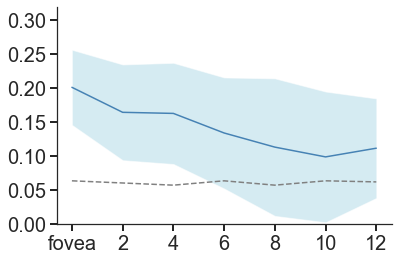

In [354]:
fig, ax = plt.subplots()
ax.plot(range(len(abs_diff_df)), abs_diff_df['DIFF'], color='steelblue')
ax.fill_between(range(len(abs_diff_df)), abs_diff_df['SEM_LOW'], abs_diff_df['SEM_HIGH'],facecolor='lightblue', alpha=0.5)


## new null
# ax.plot(range(len(null_abs_diff_df_short)), null_abs_diff_df_short['MEAN_NULL'])
# ax.fill_between(range(len(null_abs_diff_df_short)), null_abs_diff_df_short['CI_LOW_NULL'], null_abs_diff_df_short['CI_UP_NULL'],facecolor='gray', alpha=0.5)

ax.plot(range(len(abs_null_diff_df_short)), abs_null_diff_df_short['CI_UP_NULL'], color='gray', linestyle='--')

prettypyplot.beautiPlot(sns)
xlabels_abs = ['fovea', '2', '4', '6', '8', '10', '12']
plt.xticks(range(7), xlabels_abs)
plt.yticks(np.arange(start=0, stop=0.35,step=0.05))
plt.ylim(0, 0.32)
ax.tick_params(axis='both',which='major',direction='out',bottom=True, left=True, width=2, length=7)
plt.savefig('abs_cc_diff_wnull.svg', format='svg', dpi=1200)

plt.show()